In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(wine.data , wine.target , test_size = 0.3)
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)
clf = clf.fit(x_train , y_train)
rfc = rfc.fit(x_train , y_train)
score_c = clf.score(x_test , y_test)
score_r = rfc.score(x_test , y_test)
print("single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

single Tree:0.9074074074074074 Random Forest:0.9814814814814815


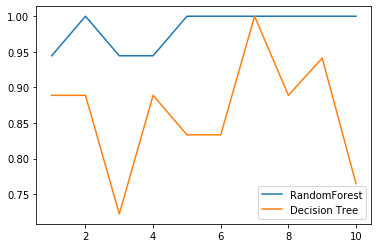

In [5]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators = 25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

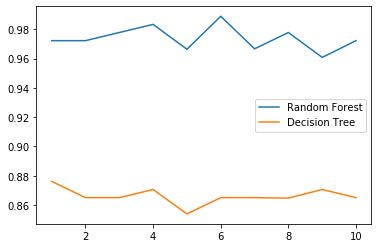

In [6]:
rfc_1 = []
clf_1 = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators = 25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10).mean()
    rfc_1.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10).mean()
    clf_1.append(clf_s)
    
plt.plot(range(1,11),rfc_1,label = "Random Forest")
plt.plot(range(1,11),clf_1,label = "Decision Tree")
plt.legend()
plt.show()

In [8]:
rfc = RandomForestClassifier(n_estimators = 20 , random_state = 2)
rfc = rfc.fit(x_train ,y_train)
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [9]:
rfc.score(x_test,y_test)

1.0

In [10]:
rfc.feature_importances_

array([0.12254025, 0.0082253 , 0.01164942, 0.03404607, 0.0243897 ,
       0.05775421, 0.10609848, 0.00505764, 0.01959281, 0.20660783,
       0.09376409, 0.15098508, 0.15928911])

In [11]:
rfc.apply(x_test)

array([[ 3,  2,  3, ...,  2, 20,  9],
       [ 3,  2,  3, ...,  2,  5,  4],
       [ 7,  5, 11, ...,  9,  8,  5],
       ...,
       [ 8, 11, 15, ..., 16, 19, 16],
       [ 3,  8,  3, ...,  2, 15,  8],
       [ 8, 11, 15, ..., 16, 19, 16]], dtype=int64)

In [12]:
rfc.predict_proba(x_test)

array([[0.  , 0.1 , 0.9 ],
       [0.  , 0.  , 1.  ],
       [0.05, 0.95, 0.  ],
       [0.25, 0.15, 0.6 ],
       [0.6 , 0.4 , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [1.  , 0.  , 0.  ],
       [0.9 , 0.  , 0.1 ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.2 , 0.8 ],
       [0.  , 0.9 , 0.1 ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.9 , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 0.1 , 0.9 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.05, 0.5 , 0.45],
       [0.  , 0.5 , 0.5 ],
       [1.  , 0.  , 0.  ],
       [0.05, 0.  , 0.95],
       [0.  , 1.  , 0.  ],
       [0.  , 0.8 , 0.2 ],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.15, 0.85],
       [0.  , 0.05, 0.95],
       [1.  , 0.  , 0.  ],
       [0.6 , 0.4 , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.15, 0.85],
       [0.75, 0.15, 0.1 ],
       [0.  , 0.15, 0.85],
       [0.  , 0.9 , 0.1 ],
 

In [ ]:
######随机森林回归

In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
reg = RandomForestRegressor(n_estimators = 100 ,random_state = 0)
cross_val_score(reg , boston.data,boston.target,cv = 10 , scoring = "neg_mean_squared_error")

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [15]:
[14]

[14]

In [17]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [18]:
####用随机森林填补缺失值

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [23]:
data = load_boston()
data.data.shape

(506, 13)

In [34]:
x_full , y_full = data.data , data.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

In [30]:
506*13*0.5

3289.0

In [32]:
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate))
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [35]:
x_missing = x_full.copy()
y_missing = y_full.copy()
x_missing[missing_samples,missing_features] = np.nan
x_missing = pd.DataFrame(x_missing)

In [36]:
x_missing.head

<bound method NDFrame.head of            0     1      2    3      4      5     6       7    8      9    10  \
0        NaN  18.0    NaN  NaN  0.538    NaN  65.2  4.0900  1.0  296.0   NaN   
1    0.02731   0.0    NaN  0.0  0.469    NaN  78.9  4.9671  2.0    NaN   NaN   
2    0.02729   NaN   7.07  0.0    NaN  7.185  61.1     NaN  2.0  242.0   NaN   
3        NaN   NaN    NaN  0.0  0.458    NaN  45.8     NaN  NaN  222.0  18.7   
4        NaN   0.0   2.18  0.0    NaN  7.147   NaN     NaN  NaN    NaN  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501      NaN   NaN    NaN  0.0  0.573    NaN  69.1     NaN  1.0    NaN  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0   NaN   
503      NaN   NaN  11.93  NaN  0.573  6.976  91.0     NaN  NaN    NaN  21.0   
504  0.10959   0.0  11.93  NaN  0.573    NaN  89.3     NaN  1.0    NaN  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030   NaN     NaN  1.0    NaN   NaN   

         

In [37]:
####使用均值填补缺失值
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan ,strategy = "mean")
x_missing_mean = imp_mean.fit_transform(x_missing)

In [40]:
x_missing_reg = x_missing.copy()
sortindex = np.argsort(x_missing_reg.isnull().sum(axis = 0)).values
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [42]:
for i in sortindex:
    df = x_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis = 1)
    df_0 = SimpleImputer(missing_values = np.nan , strategy = "constant" , fill_value = 0).fit_transform(df)
    y_train = fillc[fillc.notnull()]
    y_test = fillc[fillc.isnull()]
    x_train = df_0[y_train.index,:]
    x_test = df_0[y_test.index,:]
    rfc = RandomForestRegressor(n_estimators = 100)
    rfc = rfc.fit(x_train,y_train)
    y_predict = rfc.predict(x_test)
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = y_predict

In [46]:
x_full.shape

(506, 13)

In [47]:
x_missing_mean.shape

(506, 13)

In [49]:
x_missing_reg.shape

(506, 13)

In [50]:
y_full.shape

(506,)

In [51]:
x = [x_full,x_missing_mean,x_missing_reg]
mse = []
std = []
for i in x:
    estimator = RandomForestRegressor(random_state = 0,n_estimators = 100)
    scores = cross_val_score(estimator , x , y_full , scoring = "neg_mean_squared_error",cv = 5).mean()
    mse.append(scores * (-1))

ValueError: Found input variables with inconsistent numbers of samples: [3, 506]